In [2]:
import matplotlib.pyplot as plt
import mplstereonet as stnt
import numpy as np
import pandas as pd

### Helpful links for plotting
- http://geologyandpython.com/structural_geology.html
- https://github.com/agilescientific/xlines/blob/master/notebooks/16_Stereonets_with_mplstereonet.ipynb

**Note**: I also modified line 448 in `stereonet_axes.py` file of the mplstereonet python package to allow it to plot as scatter with dynamic marker sizes instead of a Line2D plot

In [86]:
def dip_direction_to_strike(dip_direction: int):
    '''
    Convert dip direction to strike
        Makes the strike data compatible with the lower hemisphere right-hand-rule
        that mplstereonets expects
    '''
    strike = (dip_direction - 90) % (360)
    return strike

def mean_dilation_angle(k, lim=50):
    '''
    Calculate dilation angle from fisher statistics kappa
    '''
    if lim == 50:
        da = 67.5 / np.sqrt(k)
        return da
    elif lim == 63:
        da = 81 / np.sqrt(k)
        return da
    elif lim == 95:
        da = 140 / np.sqrt(k)
        return da
    else:
        raise ValueError("Input limit value should be one of 50, 63, or 95")


### Import the Cloud Compare output files

In [96]:
# Auto KD Tree Facets
fct = pd.read_csv('../Files/Assgn_02/BD_auto_facets.csv', sep=';')
fct.columns = [name.lstrip().lower() for name in fct.columns] # Remove space from column names
fct['strike'] = dip_direction_to_strike(fct['dip dir.']) # Convert dip dir. to strike

# Block sizes as lineaments
blsz = pd.read_csv('../Files/Assgn_02/BD_block_sizes_lineations.csv')
blsz.columns = [name.lower() for name in blsz.columns]

# Normal place orientations for different outcrop fractures by face
# Face 1
npl_fc1 = pd.read_csv("../Files/Assgn_02/BD_face_1_norm_pl_meas_planes.csv")
npl_fc1.columns = [name.lower() for name in npl_fc1.columns]

### Plot the block faces stereonet

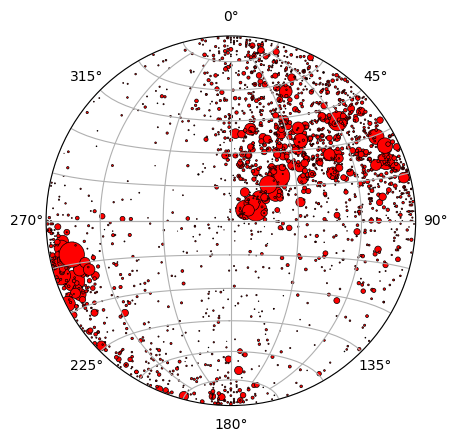

In [103]:
fig, ax = stnt.subplots()
ax.grid()

#ax.plane(fct.strike, fct.dip, color='darkred', lw=0.1, alpha=0.15)
ax.pole(fct.strike, fct.dip, color='red', s=fct.surface*20, ec='k', 
            marker='o',ls='-',lw=0.5)
plt.savefig('../Figures/Assgn_02_auto_block_face_stereonet.png', dpi=200, facecolor='white', 
            edgecolor='none', bbox_inches='tight')
plt.show()

### Block Size Distribution

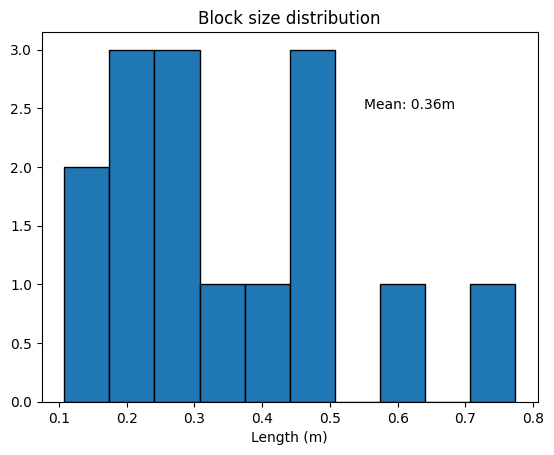

In [102]:
fig,ax = plt.subplots()
ax.hist(blsz.length,ec='k')
ax.text(0.55, 2.5, f"Mean: {blsz.length.mean():.2f}m")
ax.set_title(f"Block size distribution")
ax.set_xlabel('Length (m)')
plt.savefig('../Figures/Assgn_02_block_size.png', dpi=200, facecolor='white', 
            edgecolor='none', bbox_inches='tight')
plt.show()

### Plot Fracture Planes and Calculate Fisher Statistics

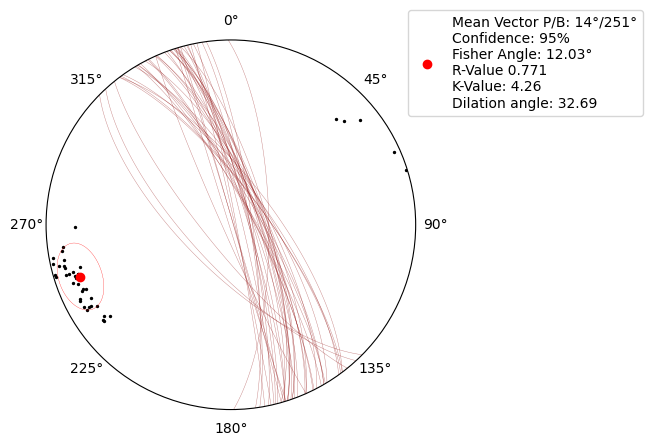

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='stereonet')
strk,dips = npl_fc1.strike, npl_fc1.dip
confidence = 95
vector, stats = stnt.find_fisher_stats(strk, dips, conf=confidence, measurement="poles")
template = (u"Mean Vector P/B: {plunge:0.0f}\u00B0/{bearing:0.0f}\u00B0\n"
            "Confidence: {conf}%\n"
            u"Fisher Angle: {fisher:0.2f}\u00B0\n"
            u"R-Value {r:0.3f}\n"
            "K-Value: {k:0.2f}\n"
            "Dilation angle: {d:0.2f}")
label = template.format(plunge=vector[0], bearing=vector[1], conf=confidence, 
                        r=stats[0], fisher=stats[1], k=stats[2], d=mean_dilation_angle(stats[2]))

ax.plane(strk, dips, color='darkred', lw=0.3, alpha=0.5)
ax.pole(strk, dips, color='k', s=2, ls='-')
ax.line(vector[0], vector[1], color="red", label=label)
ax.cone(vector[0], vector[1], stats[1], fc="None", ec="red", lw=0.2)
ax.legend(bbox_to_anchor=(0.96, 1.1), numpoints=1)
plt.savefig('../Figures/Assgn_02_fracture_fisher_stats.png', dpi=200, facecolor='white', 
            edgecolor='none', bbox_inches='tight')
plt.show()